# Men's Rankings

Get ratings of each team in a given year. This file needs to be ran for every relevant year (2012 to 2024). 

### Web Scraping

Fair warning that this program unfortunately takes a very long time to run due to web scraping limits set by Sports Reference

In [1]:
import pandas as pd
import numpy as np
import time

season = 2024

df_active_teams = pd.read_html('https://www.sports-reference.com/cbb/schools/index.html')[0]
time.sleep(2)

df_active_teams = df_active_teams.loc[~df_active_teams['School'].isin([np.NaN, 'School']), :].reset_index(drop=True)

df_active_teams['From'] = pd.to_numeric(df_active_teams['From'], errors='coerce')
df_active_teams['To'] = pd.to_numeric(df_active_teams['To'], errors='coerce')

df_active_teams = df_active_teams.loc[(df_active_teams['To'] >= season) & (df_active_teams['From'] <= season), :].reset_index(drop=True)

if season == 2021:  # if 2021, remove ivy league because they cancelled their season in 2021
    df_active_teams = df_active_teams.loc[
        ~df_active_teams['School'].isin(['Princeton', 'Harvard', 'Yale', 'Pennsylvania', 'Brown', 'Columbia', 'Cornell', 'Dartmouth']), 
        :
    ].reset_index(drop=True)

df_active_teams

,Rk,School,"City, State",From,To,Yrs,G,W,L,W-L%,SRS,SOS,AP,CREG,CTRN,NCAA,FF,NC
0,1,Abilene Christian,"Abilene, Texas",1971,2024,14,422,226,196,.536,-7.69,-5.57,0,0,2,2,0,0
1,2,Air Force,"USAF Academy, Colorado",1958,2024,67,1843,794,1049,.431,-2.79,1.34,0,1,0,4,0,0
2,3,Akron,"Akron, Ohio",1902,2024,73,1717,1027,690,.598,0.01,-1.56,0,9,6,6,0,0
3,4,Alabama,"Tuscaloosa, Alabama",1913,2024,111,2891,1790,1100,.619,7.95,4.92,17,12,10,25,0,0
4,5,Alabama A&M,"Normal, Alabama",2000,2024,25,721,276,445,.383,-16.62,-11.07,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,487,Wright State,"Dayton, Ohio",1988,2024,37,1128,631,497,.559,-1.32,-2.56,0,4,4,4,0,0
358,488,Wyoming,"Laramie, Wyoming",1905,2024,119,2876,1609,1267,.559,2.73,2.74,4,21,3,16,1,1
359,489,Xavier,"Cincinnati, Ohio",1920,2024,103,2697,1611,1086,.597,6.07,3.99,13,18,9,29,0,0
360,490,Yale,"New Haven, Connecticut",1896,2024,128,3084,1565,1516,.508,-5.99,-4.46,1,16,3,7,0,0


In [2]:
from datetime import datetime

cutoff_dates = {
    2012: datetime(2012, 3, 14),
    2013: datetime(2013, 3, 20),
    2014: datetime(2014, 3, 19),
    2015: datetime(2015, 3, 18),
    2016: datetime(2016, 3, 16),
    2017: datetime(2017, 3, 15),
    2018: datetime(2018, 3, 14),
    2019: datetime(2019, 3, 20),
    2021: datetime(2021, 3, 18),
    2022: datetime(2022, 3, 16),
    2023: datetime(2023, 3, 15),
    2024: datetime(2024, 3, 20),
}

cutoff_dates[season]

datetime.datetime(2024, 3, 20, 0, 0)

Get school names used in Sports Reference URL

In [3]:
df_active_teams['URL School'] = df_active_teams['School']

# hard code some schools that cause issues
df_active_teams.loc[df_active_teams['School'] == 'Bowling Green', 'URL School'] = 'Bowling Green State'
df_active_teams.loc[df_active_teams['School'] == 'BYU', 'URL School'] = 'Brigham Young'
df_active_teams.loc[df_active_teams['School'] == 'Louisiana', 'URL School'] = 'Louisiana Lafayette'
df_active_teams.loc[df_active_teams['School'] == 'LSU', 'URL School'] = 'Louisiana State'
df_active_teams.loc[df_active_teams['School'] == 'Ole Miss', 'URL School'] = 'Mississippi'
df_active_teams.loc[df_active_teams['School'] == 'Pitt', 'URL School'] = 'Pittsburgh'
df_active_teams.loc[df_active_teams['School'] == 'SMU', 'URL School'] = 'Southern Methodist'
df_active_teams.loc[df_active_teams['School'] == 'UAB', 'URL School'] = 'Alabama Birmingham'
df_active_teams.loc[df_active_teams['School'] == 'UCF', 'URL School'] = 'Central Florida'
df_active_teams.loc[df_active_teams['School'] == 'USC', 'URL School'] = 'Southern California'
df_active_teams.loc[df_active_teams['School'] == 'UTEP', 'URL School'] = 'Texas El Paso'
df_active_teams.loc[df_active_teams['School'] == 'UTSA', 'URL School'] = 'Texas San Antonio'
df_active_teams.loc[df_active_teams['School'] == 'Sam Houston', 'URL School'] = 'Sam Houston State'
df_active_teams.loc[df_active_teams['School'] == 'Houston Christian', 'URL School'] = 'Houston Baptist'
df_active_teams.loc[df_active_teams['School'] == 'Kansas City', 'URL School'] = 'Missouri Kansas City'
df_active_teams.loc[df_active_teams['School'] == 'Little Rock', 'URL School'] = 'Arkansas Little Rock'
df_active_teams.loc[df_active_teams['School'] == 'NC State', 'URL School'] = 'North Carolina State'
df_active_teams.loc[df_active_teams['School'] == 'Omaha', 'URL School'] = 'Nebraska Omaha'
df_active_teams.loc[df_active_teams['School'] == 'Purdue Fort Wayne', 'URL School'] = 'IPFW'
df_active_teams.loc[df_active_teams['School'] == 'TCU', 'URL School'] = 'Texas Christian'
df_active_teams.loc[df_active_teams['School'] == 'Texas-Rio Grande Valley', 'URL School'] = 'Texas Pan American'
df_active_teams.loc[df_active_teams['School'] == 'The Citadel', 'URL School'] = 'Citadel'
df_active_teams.loc[df_active_teams['School'] == 'Utah Tech', 'URL School'] = 'Dixie State'
df_active_teams.loc[df_active_teams['School'] == 'St. Thomas', 'URL School'] = 'St. Thomas MN'
df_active_teams.loc[df_active_teams['School'] == 'UC Berkley', 'URL School'] = 'California'
df_active_teams.loc[df_active_teams['School'] == 'UT Arlington', 'URL School'] = 'Texas Arlington'
df_active_teams.loc[df_active_teams['School'] == 'FDU', 'URL School'] = 'Fairleigh Dickinson'
df_active_teams.loc[df_active_teams['School'] == 'Hartford Hawks', 'URL School'] = 'Hartford'
df_active_teams.loc[df_active_teams['School'] == 'Savannah State Tigers', 'URL School'] = 'Savannah State'
df_active_teams.loc[df_active_teams['School'] == 'St. Francis (NY) Terriers', 'URL School'] = 'St. Francis (NY)'

df_active_teams['URL School'] = df_active_teams['URL School'].str.replace(r'^UC\s', 'California ', regex=True)
df_active_teams['URL School'] = df_active_teams['URL School'].str.replace(r'^UNC\s', 'North Carolina ', regex=True)

In [4]:
urls = (
    'https://www.sports-reference.com/cbb/schools/' +
    df_active_teams['URL School'].str.replace(' ', '-', regex=False).str.replace('[)(&.\']', '', regex=True).str.replace('--', '-', regex=False).str.lower() +
    '/men/' + str(season) +
    '-gamelogs.html'
)

urls

0      https://www.sports-reference.com/cbb/schools/a...
1      https://www.sports-reference.com/cbb/schools/a...
2      https://www.sports-reference.com/cbb/schools/a...
3      https://www.sports-reference.com/cbb/schools/a...
4      https://www.sports-reference.com/cbb/schools/a...
                             ...                        
357    https://www.sports-reference.com/cbb/schools/w...
358    https://www.sports-reference.com/cbb/schools/w...
359    https://www.sports-reference.com/cbb/schools/x...
360    https://www.sports-reference.com/cbb/schools/y...
361    https://www.sports-reference.com/cbb/schools/y...
Name: URL School, Length: 362, dtype: object

In [5]:
from urllib.error import HTTPError
from tqdm.notebook import tqdm

problems = []

l = []
loop = tqdm(
    np.array((df_active_teams['School'], urls)).transpose(),  # get both school and url into loop iteration
    bar_format='{bar}{percentage:3.0f}%{r_bar}   {desc}'  # make the description not affect bar location
)
for (school, url) in loop:
  try:
    loop.set_description(f'{school}')
    # print(f'{i:03d}: {url}')
    df_team_season = pd.read_html(url)[-1]  # schools that were ranked have that info as the first table on the site
    time.sleep(2)

    df_team_season.columns = [i[1] if 'Unnamed' in i[0] else i[0] + ' ' + i[1] for i in df_team_season.columns]
    df_team_season.insert(2, 'Team', school)
    l.append(df_team_season)
  except ValueError as e:
    print(f'{url} | ValueError: {e}')
    time.sleep(2)
  except HTTPError as e:
    if e.code == 404:
      print(f'{url} | {e}')
      time.sleep(2)
    else:
      print(f'{url} | {e}')
      break

df = pd.concat(l, ignore_index=True)

df

            0%| 0/362 [00:00<?, ?it/s]   

,G,Date,Team,Unnamed: 2_level_1,Opp,W/L,Tm,Opp,School FG,School FGA,...,Opponent FT,Opponent FTA,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF
0,1,2023-11-06,Abilene Christian,@,Oklahoma State,W,64,59,26,57,...,8,20,.400,6,32,13,9,2,12,16
1,2,2023-11-10,Abilene Christian,@,NC State,L,64,84,20,57,...,20,24,.833,12,34,12,4,3,7,20
2,3,2023-11-14,Abilene Christian,NaN,Prairie View,L,74,79,23,60,...,33,34,.971,8,34,7,8,5,14,23
3,4,2023-11-17,Abilene Christian,N,San Jose State,W,77,71,25,59,...,7,12,.583,9,35,13,4,3,6,18
4,5,2023-11-19,Abilene Christian,N,Fordham,W,59,45,22,55,...,12,21,.571,16,41,3,5,3,19,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,28,2024-02-17,Youngstown State,@,Cleveland State,L,73,81,25,58,...,15,20,.750,7,28,16,9,1,9,22
12596,29,2024-02-23,Youngstown State,@,Milwaukee,W (1 OT),84,80,32,78,...,18,21,.857,13,37,19,6,4,14,23
12597,30,2024-02-25,Youngstown State,@,Green Bay,W,71,59,26,55,...,9,12,.750,4,20,15,2,3,10,15
12598,31,2024-02-28,Youngstown State,NaN,Detroit Mercy,W,69,55,26,61,...,6,9,.667,11,35,13,10,4,9,14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   G                    12238 non-null  object 
 1   Date                 12238 non-null  object 
 2   Team                 12600 non-null  object 
 3   Unnamed: 2_level_1   6370 non-null   object 
 4   Opp                  12222 non-null  object 
 5   W/L                  12117 non-null  object 
 6   Tm                   12117 non-null  object 
 7   Opp                  12117 non-null  object 
 8   School FG            12479 non-null  object 
 9   School FGA           12479 non-null  object 
 10  School FG%           12479 non-null  object 
 11  School 3P            12479 non-null  object 
 12  School 3PA           12479 non-null  object 
 13  School 3P%           12479 non-null  object 
 14  School FT            12479 non-null  object 
 15  School FTA           12479 non-null 

### Data Setup

In [7]:
temp = df.copy()

In [8]:
df = temp.copy()

Fix column names and drop useless columns

In [9]:
df.columns = (
    ['G', 'Date', 'Team', 'Location', 'Opponent', 'Result', 'Team Score', 'Opponent Score'] +
    [c for c in df.columns[8:]]
)

# use "Team" as prefix instead of "School"
df.columns = df.columns.str.replace('School', 'Team', regex=False)

# drop columns that are completely null
df = df[[c for c in df.columns if df.loc[:, c].notna().any()]].copy()

# drop other irrelevant columns
df.drop(columns=['G'], inplace=True)

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent FT,Opponent FTA,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF
0,2023-11-06,Abilene Christian,@,Oklahoma State,W,64,59,26,57,.456,...,8,20,.400,6,32,13,9,2,12,16
1,2023-11-10,Abilene Christian,@,NC State,L,64,84,20,57,.351,...,20,24,.833,12,34,12,4,3,7,20
2,2023-11-14,Abilene Christian,NaN,Prairie View,L,74,79,23,60,.383,...,33,34,.971,8,34,7,8,5,14,23
3,2023-11-17,Abilene Christian,N,San Jose State,W,77,71,25,59,.424,...,7,12,.583,9,35,13,4,3,6,18
4,2023-11-19,Abilene Christian,N,Fordham,W,59,45,22,55,.400,...,12,21,.571,16,41,3,5,3,19,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,2024-02-17,Youngstown State,@,Cleveland State,L,73,81,25,58,.431,...,15,20,.750,7,28,16,9,1,9,22
12596,2024-02-23,Youngstown State,@,Milwaukee,W (1 OT),84,80,32,78,.410,...,18,21,.857,13,37,19,6,4,14,23
12597,2024-02-25,Youngstown State,@,Green Bay,W,71,59,26,55,.473,...,9,12,.750,4,20,15,2,3,10,15
12598,2024-02-28,Youngstown State,NaN,Detroit Mercy,W,69,55,26,61,.426,...,6,9,.667,11,35,13,10,4,9,14


Reformat result column because it contains information about overtime

In [10]:
# remove games that have not been played
df = df.loc[(df['Result'].notna()) & (df['Result'] != 'W/L'), :].reset_index(drop=True)

# get overtime info
df['Overtimes Amount'] = df['Result'].str.extract(r'(\d+)').astype('float16')
df.loc[df['Overtimes Amount'].isna(), 'Overtimes Amount'] = 0
df['Overtimes Amount'] = df['Overtimes Amount'].astype(int)

# binary overtime flag
df['Overtime'] = df['Overtimes Amount'].copy()
df.loc[df['Overtime'] > 1, 'Overtime'] = 1
df['Overtime'] = df['Overtime'].astype('int8')

# reformat result column
df['Result'] = df['Result'].str[:1].map({'W': 1, 'L': -1}).astype('int8')

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime
0,2023-11-06,Abilene Christian,@,Oklahoma State,1,64,59,26,57,.456,...,.400,6,32,13,9,2,12,16,0,0
1,2023-11-10,Abilene Christian,@,NC State,-1,64,84,20,57,.351,...,.833,12,34,12,4,3,7,20,0,0
2,2023-11-14,Abilene Christian,NaN,Prairie View,-1,74,79,23,60,.383,...,.971,8,34,7,8,5,14,23,0,0
3,2023-11-17,Abilene Christian,N,San Jose State,1,77,71,25,59,.424,...,.583,9,35,13,4,3,6,18,0,0
4,2023-11-19,Abilene Christian,N,Fordham,1,59,45,22,55,.400,...,.571,16,41,3,5,3,19,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11750,2024-02-17,Youngstown State,@,Cleveland State,-1,73,81,25,58,.431,...,.750,7,28,16,9,1,9,22,0,0
11751,2024-02-23,Youngstown State,@,Milwaukee,1,84,80,32,78,.410,...,.857,13,37,19,6,4,14,23,1,1
11752,2024-02-25,Youngstown State,@,Green Bay,1,71,59,26,55,.473,...,.750,4,20,15,2,3,10,15,0,0
11753,2024-02-28,Youngstown State,NaN,Detroit Mercy,1,69,55,26,61,.426,...,.667,11,35,13,10,4,9,14,0,0


Reformat location column for home/neutral/away

In [11]:
df['Location'] = df['Location'].map({np.NaN: 1, 'N': 0, '@': -1}).astype('int8')

df['Location']

0       -1
1       -1
2        1
3        0
4        0
        ..
11750   -1
11751   -1
11752   -1
11753    1
11754    1
Name: Location, Length: 11755, dtype: int8

Other general fixes

In [12]:
# fix dates
df['Date'] = pd.to_datetime(df['Date'])

# only include games before NCAA tournament
df = df.loc[df['Date'] <= cutoff_dates[season], :].reset_index(drop=True)

# fix column types
df.loc[:, df.columns.str.contains('Team ', regex=False)] = df.loc[:, df.columns.str.contains('Team ', regex=False)].astype('float64')
df.loc[:, df.columns.str.contains('Opponent ', regex=False)] = df.loc[:, df.columns.str.contains('Opponent ', regex=False)].astype('float64')

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime
0,2023-11-06,Abilene Christian,-1,Oklahoma State,1,64.0,59.0,26.0,57.0,0.456,...,0.400,6.0,32.0,13.0,9.0,2.0,12.0,16.0,0,0
1,2023-11-10,Abilene Christian,-1,NC State,-1,64.0,84.0,20.0,57.0,0.351,...,0.833,12.0,34.0,12.0,4.0,3.0,7.0,20.0,0,0
2,2023-11-14,Abilene Christian,1,Prairie View,-1,74.0,79.0,23.0,60.0,0.383,...,0.971,8.0,34.0,7.0,8.0,5.0,14.0,23.0,0,0
3,2023-11-17,Abilene Christian,0,San Jose State,1,77.0,71.0,25.0,59.0,0.424,...,0.583,9.0,35.0,13.0,4.0,3.0,6.0,18.0,0,0
4,2023-11-19,Abilene Christian,0,Fordham,1,59.0,45.0,22.0,55.0,0.400,...,0.571,16.0,41.0,3.0,5.0,3.0,19.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11750,2024-02-17,Youngstown State,-1,Cleveland State,-1,73.0,81.0,25.0,58.0,0.431,...,0.750,7.0,28.0,16.0,9.0,1.0,9.0,22.0,0,0
11751,2024-02-23,Youngstown State,-1,Milwaukee,1,84.0,80.0,32.0,78.0,0.410,...,0.857,13.0,37.0,19.0,6.0,4.0,14.0,23.0,1,1
11752,2024-02-25,Youngstown State,-1,Green Bay,1,71.0,59.0,26.0,55.0,0.473,...,0.750,4.0,20.0,15.0,2.0,3.0,10.0,15.0,0,0
11753,2024-02-28,Youngstown State,1,Detroit Mercy,1,69.0,55.0,26.0,61.0,0.426,...,0.667,11.0,35.0,13.0,10.0,4.0,9.0,14.0,0,0


Remap opponent names because the opponents sometimes have a different naming convention than the team names

In [13]:
# create new dataframe from opposite perspective    team <--> opponent
df_switch = df.copy()

df_switch.columns = df_switch.columns.str.replace(
    'Team', '_TEMP_', regex=False
).str.replace(
    'Opponent', 'Team', regex=False
).str.replace(
    '_TEMP_', 'Opponent', regex=False
)

df_switch[['Location', 'Result']] *= -1

# get fixed opponent names
df['Opponent'] = pd.merge(
    df, df_switch,
    how='left',
    on=(
        ['Date', 'Location', 'Result'] +
        list(df.loc[:, df.columns.str.contains('Team ')].columns) +
        list(df.loc[:, df.columns.str.contains('Opponent ')].columns)
    )
)['Opponent_y']

# Remove matchups that are not division 1
df = df.loc[df['Opponent'].notna(), :].reset_index(drop=True)

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime
0,2023-11-06,Abilene Christian,-1,Oklahoma State,1,64.0,59.0,26.0,57.0,0.456,...,0.400,6.0,32.0,13.0,9.0,2.0,12.0,16.0,0,0
1,2023-11-10,Abilene Christian,-1,NC State,-1,64.0,84.0,20.0,57.0,0.351,...,0.833,12.0,34.0,12.0,4.0,3.0,7.0,20.0,0,0
2,2023-11-14,Abilene Christian,1,Prairie View,-1,74.0,79.0,23.0,60.0,0.383,...,0.971,8.0,34.0,7.0,8.0,5.0,14.0,23.0,0,0
3,2023-11-17,Abilene Christian,0,San Jose State,1,77.0,71.0,25.0,59.0,0.424,...,0.583,9.0,35.0,13.0,4.0,3.0,6.0,18.0,0,0
4,2023-11-19,Abilene Christian,0,Fordham,1,59.0,45.0,22.0,55.0,0.400,...,0.571,16.0,41.0,3.0,5.0,3.0,19.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,2024-02-17,Youngstown State,-1,Cleveland State,-1,73.0,81.0,25.0,58.0,0.431,...,0.750,7.0,28.0,16.0,9.0,1.0,9.0,22.0,0,0
11234,2024-02-23,Youngstown State,-1,Milwaukee,1,84.0,80.0,32.0,78.0,0.410,...,0.857,13.0,37.0,19.0,6.0,4.0,14.0,23.0,1,1
11235,2024-02-25,Youngstown State,-1,Green Bay,1,71.0,59.0,26.0,55.0,0.473,...,0.750,4.0,20.0,15.0,2.0,3.0,10.0,15.0,0,0
11236,2024-02-28,Youngstown State,1,Detroit Mercy,1,69.0,55.0,26.0,61.0,0.426,...,0.667,11.0,35.0,13.0,10.0,4.0,9.0,14.0,0,0


Set up adjusted Score Differential

In [14]:
blowout_threshold = 18  # adjusted score differential will only account up to this score difference

df['Score Differential'] = df['Team Score'] - df['Opponent Score']

df['Adjusted Score Differential'] = df['Score Differential'].abs()

df.loc[df['Adjusted Score Differential'] > blowout_threshold, 'Adjusted Score Differential'] = blowout_threshold

df['Adjusted Score Differential'] = df['Adjusted Score Differential']**(np.log(1.5)/np.log(blowout_threshold))

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime,Score Differential,Adjusted Score Differential
0,2023-11-06,Abilene Christian,-1,Oklahoma State,1,64.0,59.0,26.0,57.0,0.456,...,32.0,13.0,9.0,2.0,12.0,16.0,0,0,5.0,1.253292
1,2023-11-10,Abilene Christian,-1,NC State,-1,64.0,84.0,20.0,57.0,0.351,...,34.0,12.0,4.0,3.0,7.0,20.0,0,0,-20.0,1.500000
2,2023-11-14,Abilene Christian,1,Prairie View,-1,74.0,79.0,23.0,60.0,0.383,...,34.0,7.0,8.0,5.0,14.0,23.0,0,0,-5.0,1.253292
3,2023-11-17,Abilene Christian,0,San Jose State,1,77.0,71.0,25.0,59.0,0.424,...,35.0,13.0,4.0,3.0,6.0,18.0,0,0,6.0,1.285760
4,2023-11-19,Abilene Christian,0,Fordham,1,59.0,45.0,22.0,55.0,0.400,...,41.0,3.0,5.0,3.0,19.0,16.0,0,0,14.0,1.448039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,2024-02-17,Youngstown State,-1,Cleveland State,-1,73.0,81.0,25.0,58.0,0.431,...,28.0,16.0,9.0,1.0,9.0,22.0,0,0,-8.0,1.338710
11234,2024-02-23,Youngstown State,-1,Milwaukee,1,84.0,80.0,32.0,78.0,0.410,...,37.0,19.0,6.0,4.0,14.0,23.0,1,1,4.0,1.214668
11235,2024-02-25,Youngstown State,-1,Green Bay,1,71.0,59.0,26.0,55.0,0.473,...,20.0,15.0,2.0,3.0,10.0,15.0,0,0,12.0,1.417062
11236,2024-02-28,Youngstown State,1,Detroit Mercy,1,69.0,55.0,26.0,61.0,0.426,...,35.0,13.0,10.0,4.0,9.0,14.0,0,0,14.0,1.448039


Get per possession stats

In [15]:
Y = 0.44

df['Possessions'] = (
    df['Team FGA'] - df['Team ORB'] + df['Team TOV'] + Y*df['Team FTA'] +
    df['Opponent FGA'] - df['Opponent ORB'] + df['Opponent TOV'] + Y*df['Opponent FTA']
)/2

df['Team PPP'] = df['Team Score'] / df['Possessions']
df['Opponent PPP'] = df['Opponent Score'] / df['Possessions']
df['Tempo'] = 40*df['Possessions'] / (40 + 5*df['Overtimes Amount'])

# some games are missing stats due to delay/finished recently
df = df.loc[df['Team PPP'].notna(), :].reset_index(drop=True)

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent TOV,Opponent PF,Overtimes Amount,Overtime,Score Differential,Adjusted Score Differential,Possessions,Team PPP,Opponent PPP,Tempo
0,2023-11-06,Abilene Christian,-1,Oklahoma State,1,64.0,59.0,26.0,57.0,0.456,...,12.0,16.0,0,0,5.0,1.253292,70.32,0.910125,0.839022,70.320000
1,2023-11-10,Abilene Christian,-1,NC State,-1,64.0,84.0,20.0,57.0,0.351,...,7.0,20.0,0,0,-20.0,1.500000,66.72,0.959233,1.258993,66.720000
2,2023-11-14,Abilene Christian,1,Prairie View,-1,74.0,79.0,23.0,60.0,0.383,...,14.0,23.0,0,0,-5.0,1.253292,71.86,1.029780,1.099360,71.860000
3,2023-11-17,Abilene Christian,0,San Jose State,1,77.0,71.0,25.0,59.0,0.424,...,6.0,18.0,0,0,6.0,1.285760,65.86,1.169147,1.078044,65.860000
4,2023-11-19,Abilene Christian,0,Fordham,1,59.0,45.0,22.0,55.0,0.400,...,19.0,16.0,0,0,14.0,1.448039,65.86,0.895840,0.683268,65.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,2024-02-17,Youngstown State,-1,Cleveland State,-1,73.0,81.0,25.0,58.0,0.431,...,9.0,22.0,0,0,-8.0,1.338710,72.46,1.007452,1.117858,72.460000
11234,2024-02-23,Youngstown State,-1,Milwaukee,1,84.0,80.0,32.0,78.0,0.410,...,14.0,23.0,1,1,4.0,1.214668,79.80,1.052632,1.002506,70.933333
11235,2024-02-25,Youngstown State,-1,Green Bay,1,71.0,59.0,26.0,55.0,0.473,...,10.0,15.0,0,0,12.0,1.417062,62.22,1.141112,0.948248,62.220000
11236,2024-02-28,Youngstown State,1,Detroit Mercy,1,69.0,55.0,26.0,61.0,0.426,...,9.0,14.0,0,0,14.0,1.448039,67.68,1.019504,0.812648,67.680000


### Model Building

##### Team Ratings

In [16]:
X = (
    pd.get_dummies(df['Team']).astype('int8') -
    pd.get_dummies(df['Opponent']).astype('int8')
)

X['Home Field Advantage'] = df['Location'].copy()

X

,Abilene Christian,Air Force,Akron,Alabama,Alabama A&M,Alabama State,Albany (NY),Alcorn State,American,Appalachian State,...,William & Mary,Winthrop,Wisconsin,Wofford,Wright State,Wyoming,Xavier,Yale,Youngstown State,Home Field Advantage
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
11234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
11235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1
11236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [17]:
from sklearn.model_selection import GroupKFold

def get_gkf_data(X, y, w, groups, cv=3):
    """
    Converts training data to list of folds
    """
    np.random.seed(22)
    gkf = GroupKFold(n_splits=cv)

    data = []
    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train = X[train_index]
        X_test = X[test_index]

        y_train = y[train_index]
        y_test = y[test_index]

        # sample weights
        w_train = w[train_index]

        data.append((X_train, X_test, y_train, y_test, w_train))

    return data

cv_data = get_gkf_data(X.to_numpy(), df['Result'].to_numpy(), df[['Adjusted Score Differential']].to_numpy(), df['Date'].to_numpy())

len(cv_data)

3

In [18]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
import warnings
import optuna

from sklearn.preprocessing import MinMaxScaler
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial, cv_data=cv_data):
    # model tuning
    C = trial.suggest_float('C', 0.1, 10, log=True)
    mod = LogisticRegression(penalty='l2', C=C, fit_intercept=False)
    minimum = trial.suggest_float('minimum', 0.1, 1.0, step=0.1)
    maximum = trial.suggest_float('maximum', 1.0, 8.0, step=0.5)
    if minimum >= maximum:
        maximum = minimum + 0.0001

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test, w_train in cv_data:
        y_actuals.append(y_test)

        weights = MinMaxScaler(feature_range=(minimum, maximum)).fit_transform(w_train).reshape(-1)

        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')  # prevent convergence warnings
            mod.fit(X_train, y_train, sample_weight=weights)

        y_preds.append(mod.predict_proba(X_test)[:, 1])

    return log_loss(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=100, show_progress_bar=True)

study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 0.161885464753142, 'minimum': 1.0, 'maximum': 5.5}

In [19]:
optuna.importance.get_param_importances(study)

{'C': 0.8251941999174166,
 'maximum': 0.09669855922468662,
 'minimum': 0.07810724085789675}

In [20]:
minimum = study.best_params['minimum']
maximum = study.best_params['maximum']

if minimum >= maximum:
        maximum = minimum + 0.0001

weight = MinMaxScaler(
    feature_range=(minimum, maximum)
).fit_transform(df[['Adjusted Score Differential']]).reshape(-1)

mod = LogisticRegression(penalty='l2', C=study.best_params['C'], fit_intercept=False)

mod.fit(X, df['Result'], sample_weight=weight)

df_ratings = pd.DataFrame(
    {
        'Team': X.columns,
        'Rating': mod.coef_[0]
    }
).sort_values(by=['Rating'], ascending=False, ignore_index=True)

df_ratings_display = df_ratings.loc[df_ratings['Team'] != 'Home Field Advantage', :].reset_index(drop=True)
df_ratings_display.index += 1

df_ratings_display['Strength'] = (np.exp(df_ratings_display['Rating'])/(1 + np.exp(df_ratings_display['Rating'])))*100

df_ratings_display.head(25)

,Team,Rating,Strength
1,Purdue,2.865430,94.611081
2,Connecticut,2.807860,94.309911
3,Houston,2.710147,93.762277
4,North Carolina,2.394173,91.638186
5,Auburn,2.265589,90.598676
6,Tennessee,2.183017,89.871402
7,Illinois,2.096713,89.058330
8,Iowa State,2.082509,88.919153
9,Arizona,2.068564,88.780998
10,Drake,1.932462,87.352169


##### Adjusted Offense/Defense Ratings

In [21]:
X_offense = pd.get_dummies(
    df['Team']
).astype('int8')

X_offense.columns += ' Offense'

X_defense = -pd.get_dummies(
    df['Opponent']
).astype('int8')

X_defense.columns += ' Defense'

X = pd.concat([X_offense, X_defense], axis=1)

X['Home Field Advantage'] = df['Location'].copy()

X

,Abilene Christian Offense,Air Force Offense,Akron Offense,Alabama Offense,Alabama A&M Offense,Alabama State Offense,Albany (NY) Offense,Alcorn State Offense,American Offense,Appalachian State Offense,...,William & Mary Defense,Winthrop Defense,Wisconsin Defense,Wofford Defense,Wright State Defense,Wyoming Defense,Xavier Defense,Yale Defense,Youngstown State Defense,Home Field Advantage
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
11234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
11235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
11236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
def get_gkf_data(X, y, groups, cv=3):
    """
    Converts training data to list of folds
    """
    np.random.seed(22)
    gkf = GroupKFold(n_splits=cv)

    data = []
    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train = X[train_index, :]
        X_test = X[test_index, :]

        y_train = y[train_index]
        y_test = y[test_index]

        data.append([X_train, X_test, y_train, y_test])

    return data

cv_data = get_gkf_data(X.to_numpy(), df['Team PPP'].to_numpy(), df['Date'].to_numpy())

len(cv_data)

3

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial, cv_data=cv_data):
    # model tuning
    alpha = trial.suggest_float('alpha', 0.1, 10, log=True)
    mod = Ridge(alpha=alpha)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test in cv_data:
        y_actuals.append(y_test)

        mod.fit(X_train, y_train)
        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=100, show_progress_bar=True)

study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 2.2847880124847246}

In [24]:
mod = Ridge(alpha=study.best_params['alpha'])

mod.fit(X, df['Team PPP'])

df_ppp = pd.DataFrame(
    {
        'Team': X.columns,
        'Rating': mod.coef_
    }
).sort_values(by=['Rating'], ascending=False, ignore_index=True)

df_ppp

,Team,Rating
0,Houston Defense,0.200887
1,Alabama Offense,0.188547
2,Connecticut Offense,0.187152
3,Purdue Offense,0.181197
4,Iowa State Defense,0.174275
...,...,...
720,Maryland-Eastern Shore Offense,-0.149006
721,Siena Offense,-0.152541
722,Virginia Military Institute Offense,-0.157692
723,Mississippi Valley State Offense,-0.199409


In [25]:
df_ppp.loc[df_ppp['Team'].str.contains('Home Field'), :]

,Team,Rating
253,Home Field Advantage,0.02433


In [26]:
df_ppp_offense = df_ppp.loc[df_ppp['Team'].str.contains(' Offense$', regex=True), :].reset_index(drop=True)

df_ppp_offense['Team'] = df_ppp_offense['Team'].str.replace(' Offense$', '', regex=True)

df_ppp_offense['Rating'] += mod.intercept_

df_ppp_offense.head(25)

,Team,Rating
0,Alabama,1.235296
1,Connecticut,1.233900
2,Purdue,1.227945
3,Baylor,1.216799
4,Illinois,1.211189
5,Arizona,1.197248
6,Duke,1.196245
7,Kentucky,1.192826
8,Gonzaga,1.191503
9,Auburn,1.191466


In [27]:
df_ppp_defense = df_ppp.loc[df_ppp['Team'].str.contains(' Defense$', regex=True), :].reset_index(drop=True)

df_ppp_defense['Team'] = df_ppp_defense['Team'].str.replace(' Defense$', '', regex=True)

df_ppp_defense['Rating'] = mod.intercept_ - df_ppp_defense['Rating']

df_ppp_defense.head(25)

,Team,Rating
0,Houston,0.845862
1,Iowa State,0.872474
2,Tennessee,0.907126
3,Saint Mary's (CA),0.918892
4,Auburn,0.922294
5,Arizona,0.923010
6,Rutgers,0.923155
7,North Carolina,0.928179
8,Virginia,0.930446
9,Michigan State,0.930480


In [28]:
df_ppp_all = pd.merge(
    df_ppp_offense.rename(columns={'Rating': 'Adjusted Offense'}),
    df_ppp_defense.rename(columns={'Rating': 'Adjusted Defense'}),
    how='inner',
    on=['Team']
)

df_ppp_all.head(25)

,Team,Adjusted Offense,Adjusted Defense
0,Alabama,1.235296,1.003788
1,Connecticut,1.233900,0.942733
2,Purdue,1.227945,0.949231
3,Baylor,1.216799,0.993208
4,Illinois,1.211189,0.994785
5,Arizona,1.197248,0.923010
6,Duke,1.196245,0.963308
7,Kentucky,1.192826,1.011787
8,Gonzaga,1.191503,0.983742
9,Auburn,1.191466,0.922294


##### Adjusted Pace Ratings

In [29]:
X = (
    pd.get_dummies(df['Team']).astype('int8') +
    pd.get_dummies(df['Opponent']).astype('int8')
)

X

,Abilene Christian,Air Force,Akron,Alabama,Alabama A&M,Alabama State,Albany (NY),Alcorn State,American,Appalachian State,...,Wichita State,William & Mary,Winthrop,Wisconsin,Wofford,Wright State,Wyoming,Xavier,Yale,Youngstown State
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
def get_gkf_data(X, y, groups, cv=3):
    """
    Converts training data to list of folds
    """
    np.random.seed(22)
    gkf = GroupKFold(n_splits=cv)

    data = []
    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train = X[train_index, :]
        X_test = X[test_index, :]

        y_train = y[train_index]
        y_test = y[test_index]

        data.append([X_train, X_test, y_train, y_test])

    return data

cv_data = get_gkf_data(X.to_numpy(), df['Tempo'].to_numpy(), df['Date'].to_numpy())

len(cv_data)

3

In [31]:
def objective(trial, cv_data=cv_data):
    # model tuning
    alpha = trial.suggest_float('alpha', 0.1, 10, log=True)
    mod = Ridge(alpha=alpha)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test in cv_data:
        y_actuals.append(y_test)

        mod.fit(X_train, y_train)
        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=100, show_progress_bar=True)

study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 5.6493648159180845}

In [32]:
mod = Ridge(alpha=study.best_params['alpha'])

mod.fit(X, df['Tempo'])

df_tempo = pd.DataFrame(
    {
        'Team': X.columns,
        'Adjusted Tempo': mod.coef_
    }
).sort_values(by=['Adjusted Tempo'], ascending=False, ignore_index=True)

df_tempo

,Team,Adjusted Tempo
0,Western Kentucky,7.021652
1,Virginia Military Institute,6.266970
2,Kennesaw State,6.205416
3,Bryant,6.128345
4,Maryland-Baltimore County,5.809350
...,...,...
357,Charlotte,-4.883589
358,North Texas,-5.468359
359,Air Force,-5.526318
360,Wagner,-5.886503


In [33]:
df_tempo['Adjusted Tempo'] += mod.intercept_

df_tempo

,Team,Adjusted Tempo
0,Western Kentucky,75.806638
1,Virginia Military Institute,75.051956
2,Kennesaw State,74.990403
3,Bryant,74.913331
4,Maryland-Baltimore County,74.594337
...,...,...
357,Charlotte,63.901398
358,North Texas,63.316627
359,Air Force,63.258668
360,Wagner,62.898484


### Visualizations

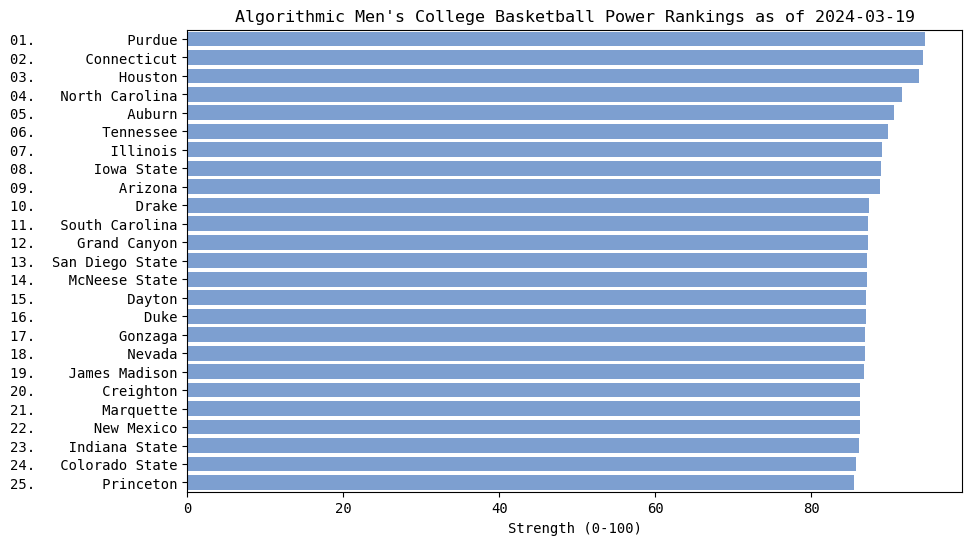

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'monospace'  # so spacing is consistent for y axis

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_ratings_display.head(25)['Strength'],
    y=(
        df_ratings_display.head(25).index.map(lambda x: str(x).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_ratings_display.head(25)['Team'].str.pad(max(df_ratings_display.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#6f9cde',
    dodge=False
)

plt.xlabel('Strength (0-100)')
plt.ylabel(None)
plt.title(f"Algorithmic Men's College Basketball Power Rankings as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

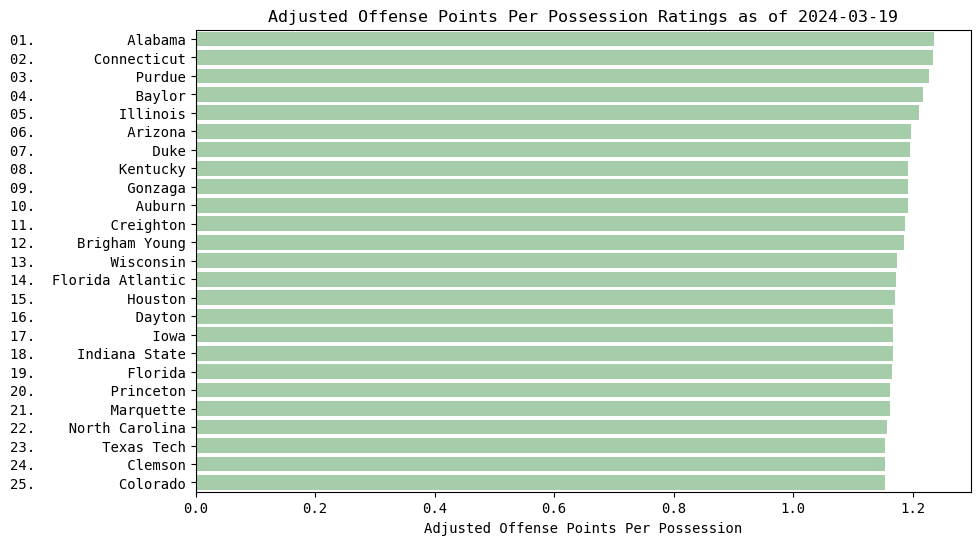

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_ppp_offense.head(25)['Rating'],
    y=(
        df_ppp_offense.head(25).index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_ppp_offense.head(25)['Team'].str.pad(max(df_ppp_offense.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#9fd4a3',
    dodge=False
)

plt.xlabel('Adjusted Offense Points Per Possession')
plt.ylabel(None)
plt.title(f"Adjusted Offense Points Per Possession Ratings as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

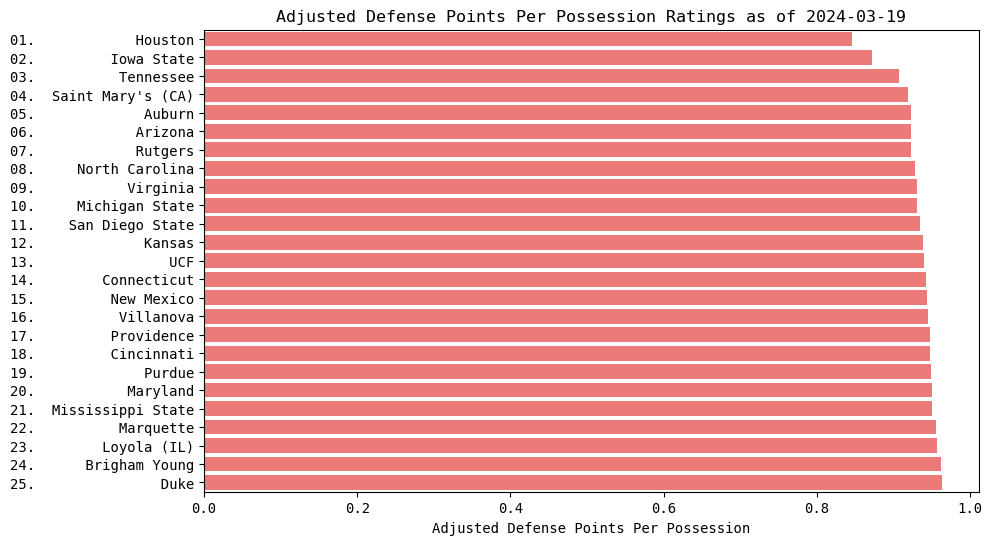

In [36]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_ppp_defense.head(25)['Rating'],
    y=(
        df_ppp_defense.head(25).index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_ppp_defense.head(25)['Team'].str.pad(max(df_ppp_defense.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#ff6865',
    dodge=False
)

plt.xlabel('Adjusted Defense Points Per Possession')
plt.ylabel(None)
plt.title(f"Adjusted Defense Points Per Possession Ratings as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

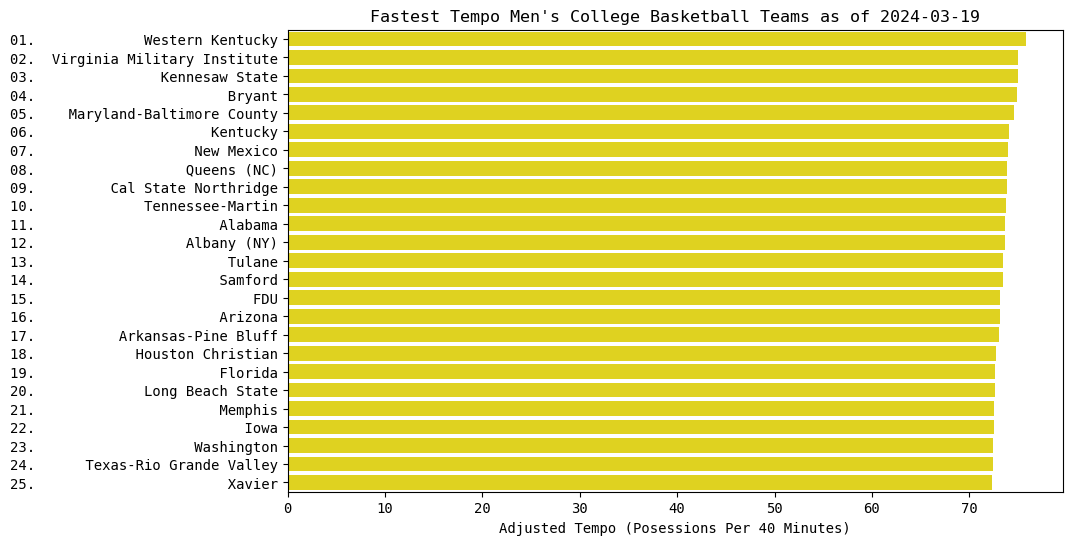

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_tempo.head(25)['Adjusted Tempo'],
    y=(
        df_tempo.head(25).index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_tempo.head(25)['Team'].str.pad(max(df_tempo.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#ffee00',
    dodge=False
)

plt.xlabel('Adjusted Tempo (Posessions Per 40 Minutes)')
plt.ylabel(None)
plt.title(f"Fastest Tempo Men's College Basketball Teams as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

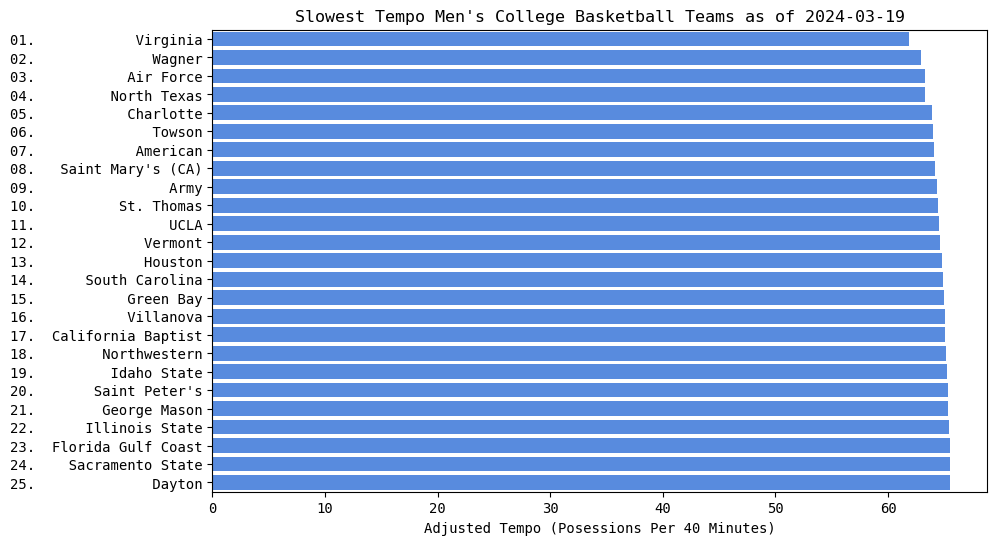

In [38]:
plt.figure(figsize=(10, 6))

df_slow = df_tempo.tail(25).iloc[::-1].reset_index(drop=True)

ax = sns.barplot(
    x=df_slow['Adjusted Tempo'],
    y=(
        df_slow.index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_slow['Team'].str.pad(max(df_slow['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#4285f4',
    dodge=False
)

plt.xlabel('Adjusted Tempo (Posessions Per 40 Minutes)')
plt.ylabel(None)
plt.title(f"Slowest Tempo Men's College Basketball Teams as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

In [39]:
import plotly.express as px

fig = px.scatter(
    df_ppp_all,
    x='Adjusted Offense',
    y='Adjusted Defense',
    hover_data='Team',
    title=f'Adjusted Points Per Possession Ratings as of {df["Date"].max().strftime("%Y-%m-%d")}',
    width=1_000, height=600,
)

fig.update_layout(
    font_family='monospace',
    hovermode='closest',
    yaxis=dict(
        showgrid=False,
        ticks='outside',
    ),
    xaxis=dict(
        showgrid=False,
        ticks='outside',
    ),
    xaxis_range=(df_ppp_all['Adjusted Offense'].min()-0.01, df_ppp_all['Adjusted Offense'].max()+0.01),
    yaxis_range=(df_ppp_all['Adjusted Defense'].max()+0.01, df_ppp_all['Adjusted Defense'].min()-0.01),
)

fig.update_traces(marker=dict(size=12))

fig.add_vline(
    x=df_ppp_all['Adjusted Offense'].mean(),
    line=dict(color="red", width=2, dash="dot")
)

fig.add_hline(
    y=df_ppp_all['Adjusted Defense'].mean(),
    line=dict(color="red", width=2, dash="dot")
)

# sloped gridlines
minimum = min(df_ppp_all['Adjusted Offense'].min(), df_ppp_all['Adjusted Defense'].min())-0.01
maximum = max(df_ppp_all['Adjusted Offense'].max(), df_ppp_all['Adjusted Defense'].max())+0.01

for offset in np.linspace(0, maximum-minimum, 6):
    fig.add_scatter(
        x=(minimum+offset, maximum+offset),
        y=(minimum, maximum),
        mode='lines',
        line_color='grey',
        opacity=0.25,
        showlegend=False,
        hoverinfo='skip'
    )

    if offset:
        fig.add_scatter(
            x=(minimum-offset, maximum-offset),
            y=(minimum, maximum),
            mode='lines',
            line_color='grey',
            opacity=0.25,
            showlegend=False,
            hoverinfo='skip'
        )

fig.show()

### Miscellaneous

##### Save Rankings

In [40]:
df_sheet = pd.merge(
    df_ratings_display, df_ppp_all,
    how='left',
    on=['Team']
)

df_sheet = pd.merge(
    df_sheet, df_tempo,
    how='left',
    on=['Team']
)

df_sheet.insert(
    df_sheet.columns.get_loc('Adjusted Offense'),
    'Efficiency Margin',
    df_sheet['Adjusted Offense'] - df_sheet['Adjusted Defense']
)

df_sheet

,Team,Rating,Strength,Efficiency Margin,Adjusted Offense,Adjusted Defense,Adjusted Tempo
0,Purdue,2.865430,94.611081,0.278715,1.227945,0.949231,68.623502
1,Connecticut,2.807860,94.309911,0.291167,1.233900,0.942733,66.314773
2,Houston,2.710147,93.762277,0.324843,1.170705,0.845862,64.748225
3,North Carolina,2.394173,91.638186,0.229677,1.157857,0.928179,71.641470
4,Auburn,2.265589,90.598676,0.269172,1.191466,0.922294,70.601135
...,...,...,...,...,...,...,...
357,Virginia Military Institute,-2.524350,7.416871,-0.226728,0.889057,1.115785,75.051956
358,IUPUI,-2.530265,7.376357,-0.252894,0.921051,1.173945,68.400487
359,Coppin State,-2.551242,7.234308,-0.250414,0.847140,1.097554,67.666157
360,Detroit Mercy,-2.783646,5.821436,-0.198613,0.954155,1.152768,68.011051


In [41]:
df_sheet.to_csv(f'../data/preprocessed/my_rankings/my_rankings_{season}.csv', index=False)
df.to_csv(f'../data/unprocessed/sports_reference/sports_reference_{season}.csv', index=False)

'Done'

'Done'